<a href="https://colab.research.google.com/github/rumeysaegilmez/IR_Pedestrian/blob/main/IR_Pedestrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'lsifir:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F361696%2F707190%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T042922Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6f97d9f925fa0531098c152d8d7c6af52bc529d4b3e81c90f1cf5266f1584118ed0c3a73aeaab4fa46ee81c1ce28586ded21a548b7a6e6b351de2026a437dc6de55ff15a62b5542107bc49ae16b7f3cbcb5096d2d97d04381a7f530a4dcc3d55aea6edaee865b9722b7b810694ab93881baa7327ff593fe968e7aae689230068d3e97ed3b5e3f0b2fdcdbee882d9442518b113babc3d0623203ea0b9ad27e4e6dad9c7b0ee0d84c19d9939c0a1eb5c285981a996ee94db92ac7fdd508c8be90102205a8bf1f0543eb42e10e6d346c25731a531368b8bd24c0b33bfa967ae512c22434c52dee3761c99812bd045be2dbb1782fded8fdd1510dbf42fcfacb75d93'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 466116816 bytes downloaded
Downloaded and uncompressed: lsifir
Data source import complete.


In [146]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


import warnings
warnings.filterwarnings('ignore')

import time

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/02958.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/01655.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/02051.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/02892.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/01553.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/02735.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/04945.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/03756.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/05485.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/02784.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/03403.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/01311.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/01767.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/02798.png
/kaggle/input/lsifir/LSIFIR/Classification/Test/pos/00987.png
/kaggle/input/lsifir/LS

In [147]:
import torch
import torch.nn as nn # neural networks
import torch.nn.functional as F
from torchsummary import summary
from PIL import Image # PIL library for read images
import matplotlib.pyplot as plt
import numpy as np
import time

In [148]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ",device)

Device:  cuda:0


In [149]:
def read_images(path, num_img):
    array = np.zeros([num_img, 64*32]) # it looks like zero array [number_of_images, 64*32] 64*32 (2048 column)
    i = 0
    for img in os.listdir(path):
        img_path = path + "//" + img
        img = Image.open(img_path, mode = "r")
        data = np.asarray(img, dtype = "uint8")
        data = data.flatten() # 1x2048
        array[i,:] = data # 1x2048(64*32) img to new array
        i += 1
    return array

In [150]:
train_negative_path = r'/kaggle/input/lsifir/LSIFIR/Classification/Train/neg'
num_train_neg_img = 43390
train_negative_array = read_images(train_negative_path, num_train_neg_img)

In [151]:
print("x_train_negative_array_shape:", train_negative_array.shape)
train_negative_array

x_train_negative_array_shape: (43390, 2048)


array([[251.,   7.,  16., ..., 155., 243., 202.],
       [131.,  83.,  48., ..., 144., 152., 159.],
       [ 51.,  48.,  44., ..., 165., 168., 162.],
       ...,
       [241.,   7.,  19., ..., 199., 214., 221.],
       [ 67., 107., 109., ...,   3.,   3.,   6.],
       [159., 108., 170., ...,   5., 244., 233.]])

In [152]:
x_train_negative_tensor = torch.from_numpy(train_negative_array) ## numpy to tensor for using torch
print("x_train_negative_tensor:", x_train_negative_tensor.size())
y_train_negative_tensor = torch.zeros(num_train_neg_img, dtype = torch.long) ## this is y_train tensor for labels
print("y_train_negative_tensor:", y_train_negative_tensor.size())

x_train_negative_tensor: torch.Size([43390, 2048])
y_train_negative_tensor: torch.Size([43390])


In [153]:
train_positive_path = r'/kaggle/input/lsifir/LSIFIR/Classification/Train/pos'
num_train_pos_img = 10208
train_positive_array = read_images(train_positive_path, num_train_pos_img)

In [154]:
print("x_train_positive_array_shape:", train_positive_array.shape)
train_positive_array

x_train_positive_array_shape: (10208, 2048)


array([[ 76.,  92., 129., ...,  27.,  36.,  44.],
       [ 28.,  30.,  34., ...,  87.,  85.,  79.],
       [ 79., 106., 119., ...,  43.,  46.,  47.],
       ...,
       [127., 127., 145., ..., 105., 100., 107.],
       [242., 244., 250., ..., 172., 165., 163.],
       [241.,  99.,  51., ..., 236., 237., 232.]])

In [155]:
x_train_positive_tensor = torch.from_numpy(train_positive_array) ## numpy to tensor for using torch
print("x_train_positive_tensor:", x_train_positive_tensor.size())
y_train_positive_tensor = torch.ones(num_train_pos_img, dtype = torch.long) ## this is y_train tensor for labels
print("y_train_positive_tensor:", y_train_positive_tensor.size())

x_train_positive_tensor: torch.Size([10208, 2048])
y_train_positive_tensor: torch.Size([10208])


In [156]:
x_train = torch.cat((x_train_negative_tensor, x_train_positive_tensor), 0)
y_train = torch.cat((y_train_negative_tensor, y_train_positive_tensor), 0)
print("x_train:", x_train.size())
print("y_train:", y_train.size())

x_train: torch.Size([53598, 2048])
y_train: torch.Size([53598])


In [157]:
test_negative_path = r'/kaggle/input/lsifir/LSIFIR/Classification/Test/neg'
num_test_neg_img = 22050
test_negative_array = read_images(test_negative_path, num_test_neg_img)

In [158]:
print("x_test_negative_array_shape:", test_negative_array.shape)
test_negative_array

x_test_negative_array_shape: (22050, 2048)


array([[134., 127., 118., ..., 244., 244., 239.],
       [178., 148., 158., ..., 114., 115., 102.],
       [121., 113., 119., ..., 107., 249., 138.],
       ...,
       [224.,  42., 140., ...,  71.,  83.,  93.],
       [226., 183., 247., ..., 158., 169., 157.],
       [199., 202., 200., ..., 172., 146., 115.]])

In [159]:
x_test_negative_tensor = torch.from_numpy(test_negative_array[:20855,:]) ## numpy to tensor for using torch
print("x_test_negative_tensor:", x_test_negative_tensor.size())
y_test_negative_tensor = torch.zeros(20855, dtype = torch.long) ## this is y_train tensor for labels
print("y_test_negative_tensor:", y_test_negative_tensor.size())

x_test_negative_tensor: torch.Size([20855, 2048])
y_test_negative_tensor: torch.Size([20855])


In [160]:
test_positive_path = r'/kaggle/input/lsifir/LSIFIR/Classification/Test/pos'
num_test_pos_img = 5944
test_positive_array = read_images(test_positive_path, num_test_pos_img)

In [161]:
print("x_test_positive_array_shape:", test_positive_array.shape)
test_positive_array

x_test_positive_array_shape: (5944, 2048)


array([[151., 110., 125., ..., 110., 110., 138.],
       [ 92.,  53.,  65., ..., 215., 234., 206.],
       [  9., 248.,  24., ...,  84.,  42.,  55.],
       ...,
       [133., 137., 148., ...,  66.,  62.,  59.],
       [119., 126., 133., ..., 193., 185., 179.],
       [248., 232., 198., ..., 106., 108.,  98.]])

In [162]:
x_test_positive_tensor = torch.from_numpy(test_positive_array) ## numpy to tensor for using torch
print("x_test_positive_tensor:", x_test_positive_tensor.size())
y_test_positive_tensor = torch.ones(num_test_pos_img, dtype = torch.long) ## this is y_train tensor for labels
print("y_test_positive_tensor:", y_test_positive_tensor.size())

x_test_positive_tensor: torch.Size([5944, 2048])
y_test_positive_tensor: torch.Size([5944])


In [163]:
x_test = torch.cat((x_test_negative_tensor, x_test_positive_tensor), 0)
y_test = torch.cat((y_test_negative_tensor, y_test_positive_tensor), 0)
print("x_test:", x_test.size())
print("y_test:", y_test.size())

x_test: torch.Size([26799, 2048])
y_test: torch.Size([26799])


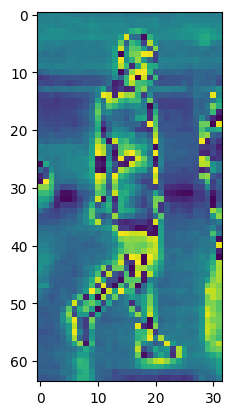

In [164]:
plt.imshow(x_train[45001,:].reshape(64, 32),)

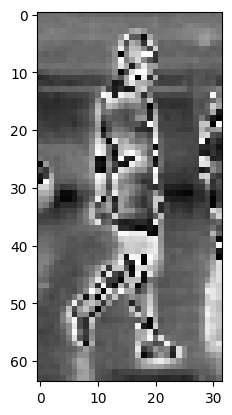

In [165]:
plt.imshow(x_train[45001,:].reshape(64, 32),cmap='gray')

In [172]:
num_epochs = 100
num_classes = 2
batch_size = 64
learning_rate = 0.00001

In [173]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(10, 16, 5)

        self.fc1 = nn.Linear(16*13*5, 520) # fully connected layer
        self.fc2 = nn.Linear(520, 130)
        self.fc3 = nn.Linear(130, num_classes)

# # conv1 > relu > pooling > conv2 > relu > pooling > flatten > fc1 > relu > fc2 > relu > output

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*13*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [174]:
model = Net().to(device)
summary(model, (1, 64, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 60, 28]             260
         MaxPool2d-2           [-1, 10, 30, 14]               0
            Conv2d-3           [-1, 16, 26, 10]           4,016
         MaxPool2d-4            [-1, 16, 13, 5]               0
            Linear-5                  [-1, 520]         541,320
            Linear-6                  [-1, 130]          67,730
            Linear-7                    [-1, 2]             262
Total params: 613,588
Trainable params: 613,588
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.20
Params size (MB): 2.34
Estimated Total Size (MB): 2.55
----------------------------------------------------------------


In [175]:
import torch.utils.data

train = torch.utils.data.TensorDataset(x_train, y_train)
trainloader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = "True")

test = torch.utils.data.TensorDataset(x_test, y_test)
testloader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = "True")

net = Net().to(device) #for gpu/cpu

In [176]:
#%% loss and optimizer
criterion = nn.CrossEntropyLoss()

import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = learning_rate, momentum=0.8)

In [178]:
start = time.time()
train_acc = []
test_acc = []
train_loss_list = []
all_preds = []
all_labels = []
use_gpu = True

for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs = inputs.view(inputs.size(0), 1, 64, 32) # reshape
        inputs = inputs.float() # float

        # use gpu
        if use_gpu:
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)

        # zero gradient
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)

        # loss
        loss = criterion(outputs, labels)

        # back
        loss.backward()

        # update weights
        optimizer.step()

    # test
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels= data

            images = images.view(images.size(0),1,64,32)
            images = images.float()

            # gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)

            outputs = net(images)

            _, predicted = torch.max(outputs.data,1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()


            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc1 = 100*correct/total
    test_acc.append(acc1)


    # train
    correct = 0
    total = 0
    train_loss = 0.0
    with torch.no_grad():
        for data in trainloader:
            images, labels= data

            images = images.view(images.size(0),1,64,32)
            images = images.float()

            # gpu
            if use_gpu:
                if torch.cuda.is_available():
                    images, labels = images.to(device), labels.to(device)

            outputs = net(images)

            _, predicted = torch.max(outputs.data,1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            train_loss += criterion(outputs, labels).item()

    acc2 = 100*correct/total
    train_acc.append(acc2)

    train_loss_list.append(train_loss / len(trainloader))

    print("Epoch: {} | Accuracy Train: {} | Accuracy Test: {} | Loss: {}".format(
        epoch, acc2, acc1, train_loss / len(trainloader)
    ))

# Final metrics after training loop
final_train_acc = train_acc[-1]
final_test_acc = test_acc[-1]
final_train_loss = train_loss_list[-1]

print("Train is done.")

end = time.time()
process_time = (end - start) / 60
print("Process time: ", process_time)

Epoch: 0 | Accuracy Train: 89.98656666293519 | Accuracy Test: 81.11869845889773 | Loss: 0.2382395086467693
Epoch: 1 | Accuracy Train: 91.78514123661331 | Accuracy Test: 82.84264338221575 | Loss: 0.19748593690785132
Epoch: 2 | Accuracy Train: 92.65644240456733 | Accuracy Test: 83.10011567595805 | Loss: 0.1780497273897001
Epoch: 3 | Accuracy Train: 93.56878988021941 | Accuracy Test: 84.22702339639538 | Loss: 0.1596904779186468
Epoch: 4 | Accuracy Train: 93.84865106906975 | Accuracy Test: 84.0628381656032 | Loss: 0.1519240933672696
Epoch: 5 | Accuracy Train: 94.28710026493526 | Accuracy Test: 84.51061606776372 | Loss: 0.14282756621964934
Epoch: 6 | Accuracy Train: 94.97929027202508 | Accuracy Test: 85.98455166237547 | Loss: 0.12996020782427742
Epoch: 7 | Accuracy Train: 94.96623008321205 | Accuracy Test: 85.05541251539236 | Loss: 0.12813960811510006
Epoch: 8 | Accuracy Train: 95.55953580357476 | Accuracy Test: 86.447255494608 | Loss: 0.11737056615982462
Epoch: 9 | Accuracy Train: 95.75357

In [179]:
print("Train Accuracy: {:.2f}%".format(final_train_acc))
print("Test Accuracy: {:.2f}%".format(final_test_acc))
print("Loss: {:.4f}".format(final_train_loss))

Train Accuracy: 99.36%
Test Accuracy: 90.65%
Loss: 0.0200


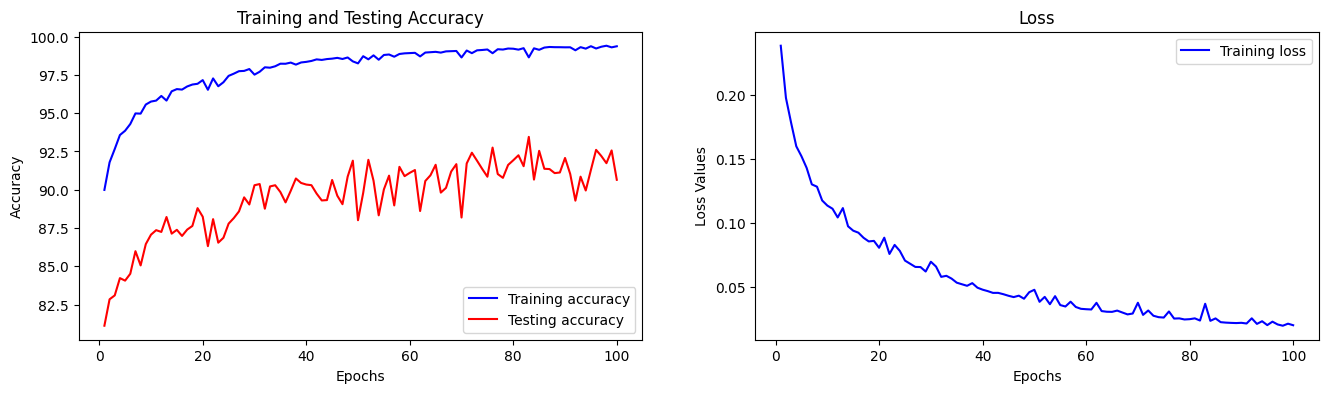

In [180]:
# Plotting the accuracy and loss
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(16, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, test_acc, 'r', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_list, 'b', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.legend()

plt.show()

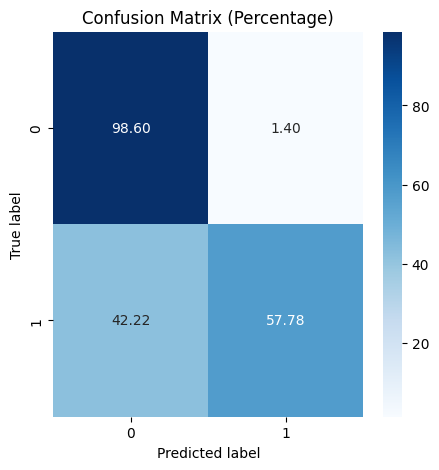

In [181]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report


cm = confusion_matrix(all_labels, all_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

df_cm = pd.DataFrame(cm_percentage, index=[i for i in range(cm.shape[0])], columns=[i for i in range(cm.shape[1])])
plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt=".2f", cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix (Percentage)')
plt.show()

In [182]:
# Calculate precision, recall, and F1 score
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.90
Recall: 0.90
F1 Score: 0.89


In [183]:
# Print precision, recall, and F1 score in a table
report = classification_report(all_labels, all_preds, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print(df_report)

              precision    recall  f1-score       support
0              0.891229  0.985995  0.936220  2.085500e+06
1              0.921622  0.577789  0.710283  5.944000e+05
accuracy       0.895455  0.895455  0.895455  8.954554e-01
macro avg      0.906426  0.781892  0.823252  2.679900e+06
weighted avg   0.897970  0.895455  0.886108  2.679900e+06
